In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import warnings
from scipy import interpolate
from astropy import coordinates
from astropy.coordinates import Galactic
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky

sns.set_context("talk")
mpl.style.use("seaborn")
sns.set_context("paper",font_scale=1.5)
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

/tmp/ipykernel_25339/4043846560.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use("seaborn")


# Data loading

In [2]:
nymgs = pd.read_csv('input_cat/gagne+downes_norep_3arcsec.csv')
gdr2  = pd.read_csv('input_cat/gaiadr2_200pc.csv',usecols=["source_id",
                                                         "ra",
                                                         "dec",
                                                         "l",
                                                         "b",
                                                         "parallax",
                                                         "parallax_error",
                                                         "pmra",
                                                         "pmdec",
                                                         "radial_velocity",
                                                         "radial_velocity_error",
                                                         "phot_g_mean_flux",
                                                         "phot_g_mean_flux_error",
                                                         "phot_g_mean_mag",
                                                         "phot_bp_mean_mag",
                                                         "phot_rp_mean_mag",
                                                          "pmra_error",
                                                          "pmdec_error"])
gdr3  = pd.read_csv('input_cat/gaiaDR3_200pc.csv',usecols=["source_id",
                                                         "ra",
                                                         "dec",
                                                         "l",
                                                         "b",
                                                         "parallax",
                                                         "parallax_error",
                                                         "pmra",
                                                         "pmdec",
                                                         "radial_velocity",
                                                         "radial_velocity_error",
                                                         "phot_g_mean_flux",
                                                         "phot_g_mean_flux_error",
                                                         "phot_g_mean_mag",
                                                         "phot_bp_mean_mag",
                                                         "phot_rp_mean_mag"])

gdr3RVMSPMS = pd.read_csv('builded_or_modified_cat/gdr3RVMSPMS.csv')

gdr3MSPMS = pd.read_csv('builded_or_modified_cat/gdr3MSPMS.csv')

In [5]:
#Import the mocapy package
from mocapy import *

#Create a moca engine object
moca = MocaEngine()

#Query the moca database to obtain a Pandas DataFrame
banyanObjects = moca.query("SELECT * FROM calc_banyan_sigma WHERE moca_aid='PL8'")

mocaObjects = moca.query("SELECT * FROM summary_all_objects WHERE moca_aid='PL8'")

In [10]:
banyanObjects = banyanObjects.set_index(banyanObjects.moca_oid).drop_duplicates('moca_oid')
a             = a.set_index(a.moca_oid)
a             = pd.concat([a,banyanObjects.ya_prob],axis=1,join='inner')

In [11]:
a                   = a[['moca_aid','gaiadr3_source_id','ya_prob']]
a.gaiadr3_source_id = pd.to_numeric(a.gaiadr3_source_id)
a                   = a.set_index(a.gaiadr3_source_id)
gdr3MSPMS           = gdr3MSPMS.set_index(gdr3MSPMS.source_id)
gdr3                = gdr3.set_index(gdr3.source_id)

In [12]:
agdr3 = pd.concat([a[['moca_aid','ya_prob']],gdr3],axis=1,join='inner')

In [13]:
aMSPMS = pd.concat([a[['moca_aid','ya_prob']],gdr3MSPMS],axis=1,join='inner')

(17.0, 2.0)

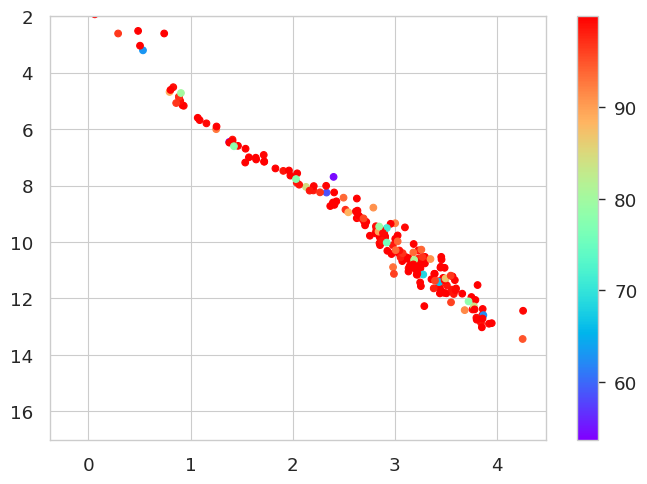

In [14]:
plt.scatter(agdr3.phot_bp_mean_mag-agdr3.phot_rp_mean_mag,agdr3.phot_g_mean_mag+5-5*np.log10(1000/agdr3.parallax),c=agdr3.ya_prob,cmap='rainbow')
# plt.scatter(aMSPMS.phot_bp_mean_mag-aMSPMS.phot_rp_mean_mag,aMSPMS.phot_g_mean_mag+5-5*np.log10(1000/aMSPMS.parallax),c=1000/aMSPMS.parallax,cmap='rainbow')
plt.colorbar()
plt.ylim(17,2)

(17.0, 2.0)

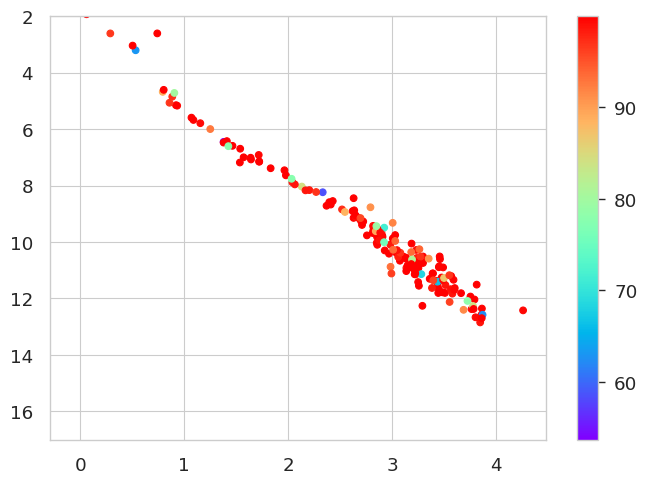

In [15]:
plt.scatter(aMSPMS.phot_bp_mean_mag-aMSPMS.phot_rp_mean_mag,aMSPMS.phot_g_mean_mag+5-5*np.log10(1000/aMSPMS.parallax),c=aMSPMS.ya_prob,cmap='rainbow')
plt.colorbar()
plt.ylim(17,2)

In [ ]:
plt.scatter(aMSPMS.ya_prob,1000/aMSPMS.parallax,c=aMSPMS.phot_g_mean_mag+5-5*np.log10(1000/aMSPMS.parallax),cmap='viridis',vmin=8)
plt.colorbar()

In [6]:
plt.scatter(agdr3.ya_prob,1000/agdr3.parallax,c=agdr3.radial_velocity_error/agdr3.radial_velocity,cmap='viridis')
plt.colorbar()

NameError: name 'agdr3' is not defined

In [108]:
amatch.shape[0]/a.shape[0]

0.9089026915113871

In [ ]:
plt.scatter(a.g)

In [6]:
dsfvdfvbdfbdfb

NameError: name 'dsfvdfvbdfbdfb' is not defined

In [ ]:
df.plx

In [ ]:
df[(df.gaiadr2_source_id.isnull().values) | (df.gaiadr3_source_id.isnull().values)]

In [ ]:
gagne = pd.read_csv('input_cat/Data.csv')

In [ ]:
gagne.columns

In [ ]:
gagne.designation

# Sky Match between the NYMG catalogue and GDR2

In [ ]:
nymgsCoords = coordinates.ICRS(ra              = nymgs.RA.to_numpy()*u.degree,
                               dec             = nymgs.DEC.to_numpy()*u.degree)
gdr2Coords  = coordinates.ICRS(ra              = gdr2.ra.to_numpy()*u.degree,
                               dec             = gdr2.dec.to_numpy()*u.degree)
nymgsMatchGdr2 = match_coordinates_sky(nymgsCoords, gdr2Coords, nthneighbor=1, storekdtree=u'_kdtree_sky')
nymgsMatchGdr2 = pd.DataFrame({'nymgRow':np.arange(0,len(nymgsMatchGdr2[0]),1),
                               'gdr2Row':nymgsMatchGdr2[0],
                               'angleSeparation':nymgsMatchGdr2[1]},index=nymgsMatchGdr2[0])

rows = nymgsMatchGdr2.gdr2Row.unique()
for i in np.arange(0,rows.shape[0],1):
    row               = rows[i]
    nymgsMatchGdr2Row = nymgsMatchGdr2[nymgsMatchGdr2.gdr2Row == row]
    if nymgsMatchGdr2Row.shape[0] > 1:
        rowToDrop = nymgsMatchGdr2Row[nymgsMatchGdr2Row.angleSeparation == nymgsMatchGdr2Row.angleSeparation.min()].gdr2Row.iloc[0]
        nymgsMatchGdr2 = nymgsMatchGdr2.drop(rowToDrop)

nymgsMatchGdr2 = pd.concat([nymgsMatchGdr2.nymgRow,gdr2],axis=1,join='inner').set_index(nymgsMatchGdr2.nymgRow)
nymgsMatchGdr2 = pd.concat([nymgsMatchGdr2,nymgs[['ID','YNMG']]],axis=1,join='inner')

# Cartesian galactic coordinates calculations for the matched data (on GDR2)

In [ ]:
newcols         = pd.DataFrame(np.zeros(shape=(nymgsMatchGdr2.shape[0],6)))
newcols.columns = ["X","Y","Z","U","V","W"]
nymgsMatchGdr2  = nymgsMatchGdr2.reset_index(drop=True)
newcols         = newcols.reset_index(drop=True)
gog             = pd.concat([nymgsMatchGdr2,newcols],axis=1)

icrs        = coordinates.ICRS(ra              = nymgsMatchGdr2["ra"].to_numpy()*u.degree,
                               dec             = nymgsMatchGdr2["dec"].to_numpy()*u.degree,
                               distance        = (1000/nymgsMatchGdr2["parallax"]).to_numpy()*u.pc,
                               pm_ra_cosdec    = nymgsMatchGdr2["pmra"].to_numpy()*u.mas/u.yr,
                               pm_dec          = nymgsMatchGdr2["pmdec"].to_numpy()*u.mas/u.yr,
                               radial_velocity = nymgsMatchGdr2["radial_velocity"].to_numpy()*u.km/u.s)

XYZUVW                 = icrs.transform_to(Galactic)
nymgsMatchGdr2["X"]    = pd.DataFrame(XYZUVW.cartesian.x)
nymgsMatchGdr2["Y"]    = pd.DataFrame(XYZUVW.cartesian.y)
nymgsMatchGdr2["Z"]    = pd.DataFrame(XYZUVW.cartesian.z)
nymgsMatchGdr2["U"]    = pd.DataFrame(XYZUVW.velocity.d_x)
nymgsMatchGdr2["V"]    = pd.DataFrame(XYZUVW.velocity.d_y)
nymgsMatchGdr2["W"]    = pd.DataFrame(XYZUVW.velocity.d_z)

# Plots to check everything's ok

In [ ]:
labels = nymgsMatchGdr2.YNMG.unique()
for i in np.arange(0,len(labels),1):
    label = labels[i]
    nymg  = nymgsMatchGdr2[nymgsMatchGdr2.YNMG == label]
    plt.scatter(nymg.X,nymg.Y,s=1)
plt.show()

# Sky positions propagation through GDR2 proper motions

In [ ]:
icrs = SkyCoord(ra=icrs.ra, dec=icrs.dec, distance=icrs.distance,
              pm_ra_cosdec=icrs.pm_ra_cosdec, pm_dec=icrs.pm_dec,
              frame='icrs',
              obstime=Time('J2015.5'))
icrs = icrs.apply_space_motion(new_obstime=Time('J2016.0'))

# Sky positions and galactic coordinates calculations for GDR3 epoch

In [ ]:
columns             = ['ra_gdr3Epoch',
                       'dec_gdr3Epoch',
                       'X_gdr3Epoch',
                       'Y_gdr3Epoch',
                       'Z_gdr3Epoch',
                       'U_gdr3Epoch',
                       'V_gdr3Epoch',
                       'W_gdr3Epoch']

newcols             = pd.DataFrame(np.zeros(shape=(nymgsMatchGdr2.shape[0],len(columns))),columns=columns).reset_index(drop=True)

nymgsMatchGdr2      = nymgsMatchGdr2.reset_index(drop=True)
gog                 = pd.concat([nymgsMatchGdr2,newcols],axis=1)


XYZUVW                           = icrs.transform_to(Galactic)
nymgsMatchGdr2["ra_gdr3Epoch"]   = pd.DataFrame(icrs.ra)
nymgsMatchGdr2["dec_gdr3Epoch"]  = pd.DataFrame(icrs.dec)
nymgsMatchGdr2["X_gdr3Epoch"]    = pd.DataFrame(XYZUVW.cartesian.x)
nymgsMatchGdr2["Y_gdr3Epoch"]    = pd.DataFrame(XYZUVW.cartesian.y)
nymgsMatchGdr2["Z_gdr3Epoch"]    = pd.DataFrame(XYZUVW.cartesian.z)
nymgsMatchGdr2["U_gdr3Epoch"]    = pd.DataFrame(XYZUVW.velocity.d_x)
nymgsMatchGdr2["V_gdr3Epoch"]    = pd.DataFrame(XYZUVW.velocity.d_y)
nymgsMatchGdr2["W_gdr3Epoch"]    = pd.DataFrame(XYZUVW.velocity.d_z)

# More plots to check all is ok

In [ ]:
labels = nymgsMatchGdr2.YNMG.unique()
for i in np.arange(0,len(labels),1):
    label = labels[i]
    nymg  = nymgsMatchGdr2[nymgsMatchGdr2.YNMG == label]
    plt.scatter(nymg.X_gdr3Epoch,nymg.Y_gdr3Epoch,s=1)
plt.show()

In [ ]:
labels = nymgsMatchGdr2.YNMG.unique()
for i in np.arange(0,len(labels),1):
    label = labels[i]
    nymg  = nymgsMatchGdr2[nymgsMatchGdr2.YNMG == label]
    plt.scatter(nymg.ra,nymg.dec,s=1)
plt.show()

In [ ]:
labels = nymgsMatchGdr2.YNMG.unique()
for i in np.arange(0,len(labels),1):
    label = labels[i]
    nymg  = nymgsMatchGdr2[nymgsMatchGdr2.YNMG == label]
    plt.scatter(nymg.ra_gdr3Epoch,nymg.dec_gdr3Epoch,s=1)
plt.show()

# Sky matches between propagated GDR2 and GDR3

In [ ]:
nymgsMatchGdr2Coords = coordinates.ICRS(ra              = nymgsMatchGdr2.ra_gdr3Epoch.to_numpy()*u.degree,
                                        dec             = nymgsMatchGdr2.dec_gdr3Epoch.to_numpy()*u.degree)
gdr3Coords  = coordinates.ICRS(ra              = gdr3.ra.to_numpy()*u.degree,
                               dec             = gdr3.dec.to_numpy()*u.degree)

nymgsMatchGdr3 = match_coordinates_sky(nymgsMatchGdr2Coords, gdr3Coords, nthneighbor=1, storekdtree=u'_kdtree_sky')

nymgsMatchGdr3 = pd.DataFrame({'nymgsMatchGdr2Row':np.arange(0,len(nymgsMatchGdr3[0]),1),
                               'gdr3Row':nymgsMatchGdr3[0],
                               'angleSeparation':nymgsMatchGdr3[1]},index=nymgsMatchGdr3[0])

rows = nymgsMatchGdr3.gdr3Row.unique()
for i in np.arange(0,rows.shape[0],1):
    row               = rows[i]
    nymgsMatchGdr3Row = nymgsMatchGdr3[nymgsMatchGdr3.gdr3Row == row]
    if nymgsMatchGdr3Row.shape[0] > 1:
        rowToDrop = nymgsMatchGdr3Row[nymgsMatchGdr3Row.angleSeparation == nymgsMatchGdr3Row.angleSeparation.min()].gdr3Row.iloc[0]
        nymgsMatchGdr3 = nymgsMatchGdr3.drop(rowToDrop)

dr2ColumnsToKeep = ['ra_gdr3Epoch',
                    'dec_gdr3Epoch',
                    'X_gdr3Epoch',
                    'Y_gdr3Epoch',
                    'Z_gdr3Epoch',
                    'U_gdr3Epoch',
                    'V_gdr3Epoch',
                    'W_gdr3Epoch',
                    'YNMG',
                    'pmra_error',
                    'pmdec_error']

nymgsMatchGdr3 = pd.concat([nymgsMatchGdr3.nymgsMatchGdr2Row,gdr3],axis=1,join='inner').set_index(nymgsMatchGdr3.nymgsMatchGdr2Row)
nymgsMatchGdr3 = pd.concat([nymgsMatchGdr3.drop('nymgsMatchGdr2Row',axis=1),nymgsMatchGdr2[dr2ColumnsToKeep]],axis=1,join='inner')

In [ ]:
nymgsMatchGdr3[nymgsMatchGdr3.source_id == 6108418181912503168].radial_velocity

In [ ]:
labels = nymgsMatchGdr3.YNMG.unique()
for i in np.arange(0,len(labels),1):
    label = labels[i]
    nymg  = nymgsMatchGdr3[nymgsMatchGdr3.YNMG == label]
    plt.scatter(nymg.ra,nymg.dec,s=1,label=label)
plt.legend()
plt.show()

In [ ]:
newcolumns = ['mu','mu_error','mu_over_error']

mu       = np.sqrt(nymgsMatchGdr3.pmra**2+nymgsMatchGdr3.pmdec**2)
mu_error = np.sqrt((nymgsMatchGdr3.pmra*nymgsMatchGdr3.pmra_error)**2+(nymgsMatchGdr3.pmdec*nymgsMatchGdr3.pmdec_error)**2)/mu
mu_over_error = np.abs(mu_error/mu)

muDataFrame = pd.DataFrame({'mu':mu,'mu_error':mu_error,'mu_over_error':mu_over_error})

nymgsMatchGdr3 = pd.concat([nymgsMatchGdr3,muDataFrame],axis=1,join='inner')

In [ ]:
nymgsMatchGdr3[nymgsMatchGdr3.source_id == 6108418181912503168].radial_velocity

In [ ]:
plt.hist(nymgsMatchGdr3.mu_over_error,bins=np.arange(0,1,0.1),log=True);
plt.xlim(0,1);
plt.xlabel(r'$\sigma_{\mu}/\mu$');
plt.ylabel(r'$N$');
plt.show();

In [ ]:
plt.hist(nymgsMatchGdr3.mu_error,bins=np.arange(0,10,1),log=True);
#plt.xlim(0,1);
plt.xlabel(r'$\sigma_{\mu}[°]$');
plt.ylabel(r'$N$');
plt.show();

In [ ]:
plt.scatter(nymgsMatchGdr3.ra-nymgsMatchGdr3.ra_gdr3Epoch,
            nymgsMatchGdr3.dec-nymgsMatchGdr3.dec_gdr3Epoch,s=15,
            c=nymgsMatchGdr3.mu_over_error,
            cmap='viridis',
            vmin=0,
            vmax=1)
plt.colorbar()
# plt.xlim(-0.00001,0.00001)
# plt.ylim(-0.00001,0.00001)
plt.xlabel(r'$\Delta\alpha[°]$')
plt.ylabel(r'$\Delta\delta[°]$')
plt.savefig('nymgsDeltaSkyPositionsMatch.png',bbox_inches='tight')

In [ ]:
nymgsMatchGdr3Filtered = nymgsMatchGdr3[nymgsMatchGdr3.mu_over_error<=0.1]

plt.scatter(nymgsMatchGdr3Filtered.ra-nymgsMatchGdr3Filtered.ra_gdr3Epoch,
            nymgsMatchGdr3Filtered.dec-nymgsMatchGdr3Filtered.dec_gdr3Epoch,s=10,
            c=np.abs(nymgsMatchGdr3Filtered.parallax_error/nymgsMatchGdr3Filtered.parallax),
            cmap='viridis')
plt.colorbar()
# plt.xlim(-0.00001,0.00001)
# plt.ylim(-0.00001,0.00001)
plt.xlabel(r'$\Delta\alpha[°]$')
plt.ylabel(r'$\Delta\delta[°]$')
plt.savefig('nymgsDeltaSkyPositionsMatch.png',bbox_inches='tight')

In [ ]:
nymgsMatchGdr3Filtered.shape[0]/nymgsMatchGdr3.shape[0]

In [ ]:
nymgsMatchGdr3Filtered = nymgsMatchGdr3Filtered[np.abs(nymgsMatchGdr3Filtered.parallax_error/nymgsMatchGdr3Filtered.parallax)<=0.1]

plt.scatter(nymgsMatchGdr3Filtered.ra-nymgsMatchGdr3Filtered.ra_gdr3Epoch,
            nymgsMatchGdr3Filtered.dec-nymgsMatchGdr3Filtered.dec_gdr3Epoch,s=10,
            c=np.abs(nymgsMatchGdr3Filtered.mu),
            cmap='viridis',
            vmax=100)
plt.colorbar()
# plt.xlim(-0.00001,0.00001)
# plt.ylim(-0.00001,0.00001)
plt.xlabel(r'$\Delta\alpha[°]$')
plt.ylabel(r'$\Delta\delta[°]$')
plt.savefig('nymgsDeltaSkyPositionsMatch.png',bbox_inches='tight')

In [ ]:
nymgsMatchGdr3Filtered = nymgsMatchGdr3Filtered[np.abs(nymgsMatchGdr3Filtered.mu_error)<=1]

plt.scatter(nymgsMatchGdr3Filtered.ra-nymgsMatchGdr3Filtered.ra_gdr3Epoch,
            nymgsMatchGdr3Filtered.dec-nymgsMatchGdr3Filtered.dec_gdr3Epoch,s=10,
            c=np.abs(nymgsMatchGdr3Filtered.mu),
            cmap='viridis',
            vmax=100)
plt.colorbar()
# plt.xlim(-0.00001,0.00001)
# plt.ylim(-0.00001,0.00001)
plt.xlabel(r'$\Delta\alpha[°]$')
plt.ylabel(r'$\Delta\delta[°]$')
plt.savefig('nymgsDeltaSkyPositionsMatch.png',bbox_inches='tight')

In [ ]:
nymgsMatchGdr3Filtered.shape[0]/nymgsMatchGdr3.shape[0]

In [ ]:
for i in np.arange(0,len(labels),1):
    label = labels[i]
    nymg = nymgsMatchGdr3[nymgsMatchGdr3.YNMG == label]
    print(f'{label}: {nymg.shape[0]}')

In [ ]:
nymgChosen = ['BPMG','COL','OCT','PL8','THA']
colors     = ['red','blue','green','orange','purple']

plt.scatter(nymgsMatchGdr2.ra,nymgsMatchGdr2.dec,s=5,color='grey')
for i in np.arange(0,len(nymgChosen),1):
    label = nymgChosen[i]
    nymg = nymgsMatchGdr3[nymgsMatchGdr2.YNMG == label]
    plt.scatter(nymg.ra,nymg.dec,s=10,color=colors[i],label=f'{label}: {nymg.shape[0]}')
plt.xlabel(r'$\alpha_{DR2}[°]$')
plt.ylabel(r'$\delta_{DR2}[°]$')
plt.legend(bbox_to_anchor=(1.,1.03,0.,0.),fontsize=10)
plt.savefig('nymgsDR2AlphaDelta.png',bbox_inches='tight')
plt.show()

In [ ]:
plt.scatter(nymgsMatchGdr2.pmra,nymgsMatchGdr2.pmdec,s=5,color='grey')
for i in np.arange(0,len(nymgChosen),1):
    label = nymgChosen[i]
    nymg = nymgsMatchGdr2[nymgsMatchGdr2.YNMG == label]
    plt.scatter(nymg.pmra,nymg.pmdec,s=10,color=colors[i],label=f'{label}: {nymg.shape[0]}')
plt.legend(bbox_to_anchor=(1.,0.75,0.,0.),fontsize=10)
plt.xlabel(r'$\mu_{\alpha}^{DR2}[mas/yr]$')
plt.ylabel(r'$\mu_{\delta}^{DR2}[mas/yr]$')
plt.xlim(-100,200)
plt.ylim(-200,100)
plt.savefig('nymgsDR2MuAlphaDelta.png',bbox_inches='tight')
plt.show()

In [ ]:
nymgChosen = ['BPMG','COL','OCT','PL8','THA']
nymgAges   = [24,42,35,60,45]
colors     = ['red','blue','green','orange','purple']

plt.scatter(nymgsMatchGdr3.ra,nymgsMatchGdr3.dec,s=5,color='grey')
for i in np.arange(0,len(nymgChosen),1):
    label = nymgChosen[i]
    nymg = nymgsMatchGdr3[nymgsMatchGdr3.YNMG == label]
    plt.scatter(nymg.ra,nymg.dec,s=10,color=colors[i],label=f'{label}: {nymg.shape[0]}')
plt.xlabel(r'$\alpha_{DR3}[°]$')
plt.ylabel(r'$\delta_{DR3}[°]$')
plt.legend(bbox_to_anchor=(1.,1.03,0.,0.),fontsize=10)
plt.savefig('nymgsDR3AlphaDelta.png',bbox_inches='tight')
plt.show()

In [ ]:
plt.scatter(nymgsMatchGdr3.pmra,nymgsMatchGdr3.pmdec,s=5,color='grey')
for i in np.arange(0,len(nymgChosen),1):
    label = nymgChosen[i]
    nymg = nymgsMatchGdr3[nymgsMatchGdr3.YNMG == label]
    plt.scatter(nymg.pmra,nymg.pmdec,s=10,color=colors[i],label=f'{label}: {nymg.shape[0]}')
plt.legend(bbox_to_anchor=(1.,0.75,0.,0.),fontsize=10)
plt.xlabel(r'$\mu_{\alpha}^{DR3}[mas/yr]$')
plt.ylabel(r'$\mu_{\delta}^{DR3}[mas/yr]$')
plt.xlim(-100,200)
plt.ylim(-200,100)
plt.savefig('nymgsDR3MuAlphaDelta.png',bbox_inches='tight')
plt.show()

In [ ]:
conditionNymgChosen = False
for i in np.arange(0,len(nymgChosen),1):
    conditionNymgChosen = conditionNymgChosen | (nymgsMatchGdr3.YNMG == nymgChosen[i])
finalNymgs = nymgsMatchGdr3[conditionNymgChosen]
finalNymgs = finalNymgs.set_index(finalNymgs.source_id)

In [ ]:
nymgs

In [ ]:
finalNymgs

In [ ]:
nymgsMatchGdr3 = nymgsMatchGdr3.set_index(nymgsMatchGdr3.source_id)
gdr3RVMSPMS = gdr3RVMSPMS.set_index(gdr3RVMSPMS.source_id)

rvMatch = pd.concat([nymgsMatchGdr3,gdr3RVMSPMS],axis=1,join='inner')

In [ ]:
gdr3MSPMS = gdr3MSPMS.set_index(gdr3MSPMS.source_id)
finalNymgsMatch = pd.concat([finalNymgs.YNMG,gdr3MSPMS],axis=1,join='inner')

In [ ]:
statsColumns    = ['NYMG','age','realN','observedN','stdX','stdY','stdZ','stdU','stdV','stdW']
finalNymgsStats = pd.DataFrame(np.zeros([len(nymgChosen),len(statsColumns)]),columns=statsColumns)

In [ ]:

gdr3RVMSPMS       = gdr3RVMSPMS.set_index(gdr3RVMSPMS.source_id)

finalNymgsRVMatch = pd.concat([finalNymgsMatch[['YNMG']],gdr3RVMSPMS],axis=1,join='inner')

In [ ]:
for i in np.arange(0,len(nymgChosen),1):
    nymg = finalNymgsRVMatch[finalNymgsRVMatch.YNMG == nymgChosen[i]]
    finalNymgsStats.NYMG.iloc[i] = nymgChosen[i]
    finalNymgsStats.realN.iloc[i] = nymgsMatchGdr3[nymgsMatchGdr3.YNMG == nymgChosen[i]].shape[0]
    finalNymgsStats.observedN.iloc[i] = nymg.shape[0]
    finalNymgsStats.age.iloc[i] = nymgAges[i]
        
finalNymgsStats

# Sigma clipping aplication to the desired NYMGs

In [ ]:
def sigmaClippingSelector(nymg,n,columns):
    for i in np.arange(0,len(columns),1):
        nymg = nymg[nymg[columns[i]]**2-nymg[columns[i]].median()**2 <= (n*nymg[columns[i]].std())**2]
    return nymg

In [ ]:
names = finalNymgsStats.NYMG
for i in np.arange(0,len(names),1):
    name = names[i]
    nymg = finalNymgsMatch[finalNymgsMatch.YNMG == name]
    plt.scatter(nymg.BR,nymg.MG)
    plt.ylim(15,-1)
    plt.show()
    plt.scatter(nymg.U,nymg.V)
    nymg = sigmaClippingSelector(nymg,2,['X','Y','Z','U','V','W'])
    plt.scatter(nymg.U,nymg.V)
    plt.xlim(-200,200)
    plt.ylim(-200,200)
    plt.show()
    plt.scatter(nymg.BR,nymg.MG)
    plt.ylim(15,-1)
    plt.show()
    for j in np.arange(4,len(statsColumns),1):
        finalNymgsStats[statsColumns[j]].iloc[i] = nymg[statsColumns[j][3]].std()

In [ ]:
import mass_photometry_tools as massPhoto
bpmg = nymgsMatchGdr3[nymgsMatchGdr3.YNMG == 'BPMG']
bpmg['MG'] = bpmg.phot_g_mean_mag+5-5*np.log10(1000/bpmg.parallax)
bpmg['BR'] = bpmg.phot_bp_mean_mag-bpmg.phot_rp_mean_mag
bpmgiso = massPhoto.isochroneSelector(data           = bpmg,
                                                      age            = 20000000.0,
                                                      deltaMag       =  [1e6,0.5],
                                                      dataMagName    = 'MG',
                                                      dataColorNames = ['phot_bp_mean_mag','phot_rp_mean_mag'])

bpmg.to_csv('BPMG.csv',index=False)
bpmgiso.to_csv('BPMG_20.csv',index=False)

In [ ]:
finalNymgsStats

In [ ]:
nymgsMatchGdr3.to_csv('nymgs_gdr3_match.csv',index=False)

finalNymgsStats.to_csv('statsForSyntheticNymgs.csv',index=False)